In [3]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib
from scipy.integrate import quad
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline

In [2]:
def g(eps):
    p = ss.norm.pdf(0) * (1-eps) + eps / 5 * ss.norm.pdf(0 / 5)
    stdMed = 1/(2 * p)
    disp = quad(lambda x: x ** 2 * (ss.norm.pdf(x) * (1-eps) + eps / 5 * ss.norm.pdf(x / 5)), -np.inf, np.inf)
    stdMean = np.sqrt(disp[0])
    return stdMed / stdMean - 1

In [3]:
from scipy.optimize import bisect

In [4]:
bisect(g, 0, 0.5)

0.026667806685509277

In [5]:
x = np.linspace(0, 0.5, 1000)
y = [g(t) for t in x]


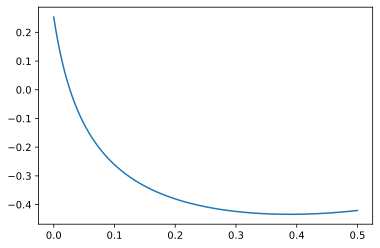

In [6]:
plt.plot(x, y)

plt.savefig('graph.png')

In [6]:
sigma = 2
def p(x):
    return 0.5 * ss.norm.pdf(x, loc = 1, scale = sigma) + 0.5 * ss.norm.pdf(x, loc = 2, scale = sigma)

In [11]:
x = np.linspace(-10, 10, 10000)
y = [p(t) for t in x]

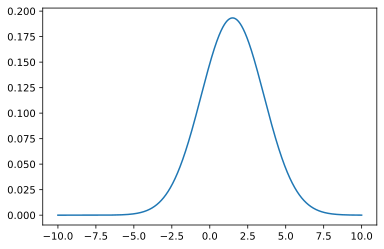

In [12]:
plt.plot(x, y)

plt.savefig('graph.png')

In [19]:
def ps(x, sigma):
    return 0.5 / (1 + np.exp((2 * x-3) / 2 * sigma ** 2))

In [16]:
x = np.linspace(-10, 10, 10000)
y1 = [ps(t, 1) for t in x]
y2 = [ps(t, 2) for t in x]
y3 = [ps(t, 3) for t in x]

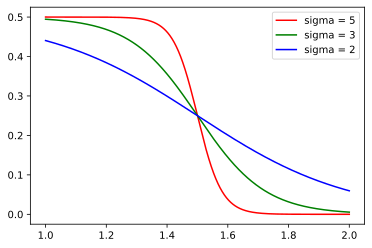

In [31]:
x = np.linspace(1,2, 1000)

plt.plot(x, ps(x, 5), '-r', label='sigma = 5')
plt.plot(x, ps(x, 3), '-g', label='sigma = 3')
plt.plot(x, ps(x, 2), '-b', label='sigma = 2')
leg = plt.legend(loc='upper right')
plt.savefig('graphs.png')